# Famous Project
## by: Eylam Kadden and Shiraz Messer

### In this project we will gather characteritis of famous people around the world                                                  and see the affect on their popularity rate.
###### first, we need to import the relevant libraries

In [8]:
import requests
import pandas as pd
import bs4
import calendar 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib as mpl
import seaborn as sns
import sklearn
import re
import os
import time
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


## Collecting Data and Crawling

#### In this section we need to use crawling to get the data straight from the website

#### At First we have to collect  as many famous people as we could from the "Famous Birthdays" website
#### We noticed that evey day and month has it's own URL
#### Every URL of day and month contains 48 famous people that borned in that day
#### For example, 1 June URL is: "https://www.famousbirthdays.com/june1.html"
#### So we collected the data of (48 famous people)*(366 days) 
##### * 366 days because of the of 28 february


In [1]:
def days_in_month(x):
    if x in {1, 3, 5, 7, 8, 10, 12}:
        return 32
    if x == 2:
        return 30
    return 31 

def get_all_sites():
    links = []
    for x in range(1,13):
        for y in range (1,days_in_month(x)):
            print(f"statring day: {y} in month:{x}")
            address= str(calendar.month_name[x].lower())+str(y)
            links.append(f"https://www.famousbirthdays.com/{address}.html")
            print(f"ended day: {y} in month:{x}")
    return links

  
    

In [3]:
def find_famous_people_by_date(url):
    response1 = requests.get(url)
    soup1 = BeautifulSoup(response1.content, "html.parser")
    mtag=soup1.find_all("a",attrs={"class":"face person-item clearfix"})
    return [t['href'] for t in mtag]

def arrange_all_famous_people_url():
    all_search_urls =get_all_sites() 
    famous_people_urls = []

    for search_url in all_search_urls:
        famous_people_urls+=find_famous_people_by_date(search_url)
    return famous_people_urls

famous_urls = arrange_all_famous_people_url()

statring day: 1 in month:1
ended day: 1 in month:1
statring day: 2 in month:1
ended day: 2 in month:1
statring day: 3 in month:1
ended day: 3 in month:1
statring day: 4 in month:1
ended day: 4 in month:1
statring day: 5 in month:1
ended day: 5 in month:1
statring day: 6 in month:1
ended day: 6 in month:1
statring day: 7 in month:1
ended day: 7 in month:1
statring day: 8 in month:1
ended day: 8 in month:1
statring day: 9 in month:1
ended day: 9 in month:1
statring day: 10 in month:1
ended day: 10 in month:1
statring day: 11 in month:1
ended day: 11 in month:1
statring day: 12 in month:1
ended day: 12 in month:1
statring day: 13 in month:1
ended day: 13 in month:1
statring day: 14 in month:1
ended day: 14 in month:1
statring day: 15 in month:1
ended day: 15 in month:1
statring day: 16 in month:1
ended day: 16 in month:1
statring day: 17 in month:1
ended day: 17 in month:1
statring day: 18 in month:1
ended day: 18 in month:1
statring day: 19 in month:1
ended day: 19 in month:1
statring da

KeyboardInterrupt: 

### We collected data of 17,568 famous people at the previous section, therefore we didn't get all the people from the website 
#### We can do better, right?
#### We noticed that every famous person page has links to 4 other people that he is related to
#### For example, for the Tom Hollad page: "Tom Holland Fans Also Viewed" and 4 page links
#### So we collected the data Recursively from all the people
#### Again, we collected data of 26344 people


In [ ]:
urls = set()
def recursiveCrawl(url,depth):
    if depth == 0:
        return
    response1 = requests.get(url)
    soup1 = BeautifulSoup(response1.content, "html.parser")
    aa = soup1.find("div", attrs = {"class": "also-viewed"}).find_all('a')
    if aa != None:
        for a in aa:
            if not a['href'] in urls: 
                urls.add(a['href'])
                recursiveCrawl(a['href'],depth-1)
            

print(len(famous_urls))
i=1
for url in famous_urls:
    print(i)
    i+=1
    recursiveCrawl(url,15)
    print(len(urls))

### We want to do everything we can in order to get the data of all the famous people from the website
#### We can use the sitemap to collect all the URLs and then to crawl the data of all the people
#### So, we took the 9 sitemap pages and combined it into one big list of all the people in the site

In [16]:
final_urls = []
for i in range (1,9):
    file = open(f"fb-sitemap-{i}.xml","r",encoding="utf8")
    con =file.read()
    soup = BeautifulSoup(con,"lxml")
    all_locs =soup.find_all("loc")
    all_urls = list(map(lambda x: x.text ,all_locs))
    people_urls = list(filter(lambda x: x.startswith("https://www.famousbirthdays.com/people/"),all_urls ))
    final_urls+=people_urls

#### The amount of the links, include false positives....
#### Now we got all the famous people links!!!
#### Isn't it great?

In [38]:
print(len(final_urls))

222898


### At first we tried to build the csv at once but it took us estimated time of 63 hours.. too bad

In [ ]:
a=len(final_urls[1:])
print(a)
i=0
famous_list=[]
for url in final_urls:
    i+=1
    famous_list.insert(0,find_info_famous_person(url))
    print(f"done {i}/{a}")
df = pd.DataFrame(famous_list)
df.to_csv("famouss.csv")
print("done")

### In order to exctract such a big amount of data in short time we used 22 threads which creates 22 csv's, each csv contains ~10000 pepole

In [13]:
import threading

t1 = threading.Thread(target=create_famous_csv,args=(1,10001,1))
t2 = threading.Thread(target=create_famous_csv, args=(10001,20001,2))
t3 = threading.Thread(target=create_famous_csv, args=(20001,30001,3))
t4 = threading.Thread(target=create_famous_csv, args=(30001,40001,4))
t5 = threading.Thread(target=create_famous_csv, args=(40001,50001,5))
t6 = threading.Thread(target=create_famous_csv, args=(50001,60001,6))
t7 = threading.Thread(target=create_famous_csv, args=(60001,70001,7))
t8 = threading.Thread(target=create_famous_csv, args=(70001,80001,8))
t9 = threading.Thread(target=create_famous_csv, args=(80001,90001,9))
t10 = threading.Thread(target=create_famous_csv, args=(90001,100001,10))
t11 = threading.Thread(target=create_famous_csv, args=(100001,110001,11))
t12 = threading.Thread(target=create_famous_csv, args=(110001,120001,12))
t13 = threading.Thread(target=create_famous_csv, args=(120001,130001,13))
t14 = threading.Thread(target=create_famous_csv, args=(130001,140001,14))
t15 = threading.Thread(target=create_famous_csv, args=(140001,150001,15))
t16 = threading.Thread(target=create_famous_csv, args=(150001,160001,16))
t17 = threading.Thread(target=create_famous_csv, args=(160001,170001,17))
t18 = threading.Thread(target=create_famous_csv, args=(170001,180001,18))
t19 = threading.Thread(target=create_famous_csv, args=(180001,190001,19))
t20 = threading.Thread(target=create_famous_csv, args=(190001,200001,20))
t21 = threading.Thread(target=create_famous_csv, args=(200001,210001,21))
t22 = threading.Thread(target=create_famous_csv, args=(210001,222898,22))


t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
t7.start()
t8.start()
t9.start()
t11.start()
t10.start()
t12.start()
t13.start()
t14.start()
t15.start()
t16.start()
t17.start()
t18.start()
t19.start()
t20.start()
t21.start()
t22.start()

### Combining all the 22 csvs into one big csv

In [100]:
df = pd.read_csv("famous1.csv")
for i in range(2,23):
    df2 = pd.read_csv(f"famous{i}.csv")
    df = pd.concat([df,df2],ignore_index=True)
df2 = pd.read_csv(f"famouss.csv")
df = pd.concat([df,df2],ignore_index=True)
df.sort_values('popularity_rate', inplace=True)
df=df.drop(df.columns[0], axis=1)
df.to_csv("famous_final.csv")


### Now we need to collect the data from every page we have
#### We created the Dataframe and filled the columns with the right data from the site pages by Crwaling

In [19]:
def find_info_famous_person(url):
    famous_person = {}
    response1 = requests.get(url)
    soup1 = BeautifulSoup(response1.content, "html.parser")
    tag1=soup1.find("div",attrs={"class":"col-sm-12"})
    tag2=soup1.find("div",attrs={"class":"stat box"})
    full_name=soup1.findChild('h1').text.split(" ")
    famous_person['first_name'] = full_name[0] 
    famous_person['last_name'] = full_name[-1]
    famous_person['proffession'] = soup1.findChild('div',attrs={"class":"person-title"}).text.strip() if soup1.findChild('div',attrs={"class":"person-title"}) else None
    all_square_tags = soup1.find('div',attrs={'class':"is-flex"}).find_all('div', attrs={'class':'stat box'}) if soup1.find('div',attrs={'class':"is-flex"}) else None
    if all_square_tags:
        for tag in all_square_tags:
            key = tag.find('h6').text.strip() if tag.find('h6') else None
            value = tag.find('a').text if tag.find('a') else None
            if key:
                famous_person[key]=value
    if 'Age' in famous_person.keys():
        age = famous_person['Age'] if type(famous_person['Age'])is str else None
        if age:
            famous_person['Age']=re.sub('\D','', age)
    if 'Happy Birthday!' in famous_person.keys():
        famous_person['Birthday']=famous_person['Happy Birthday!']
        del famous_person['Happy Birthday!']
    if 'Birthday' in famous_person.keys():
        famous_person['month'] = tag2.find('a').find('span').text if tag2.find('a').find('span') else None
        famous_person['day'] = re.sub('\D', '', tag2.find('a').text) if tag2.find('a') else None
        famous_person['year'] = tag2.find_all('a')[1].text if len(tag2.find_all('a'))>1 else None
        del famous_person['Birthday']
    if 'Birth Year'in famous_person.keys():
        famous_person['year'] = famous_person['Birth Year']
        del famous_person['Birth Year']
    famous_person['popularity_rate']=soup1.find("div",attrs={"class":"rank-no"}).text[1:] if soup1.find("div",attrs={"class":"rank-no"}) else None
    return famous_person


In [29]:
def create_famous_csv(start,end,num):
    famous_list=[]
    for i,url in enumerate(final_urls[start:end]):
        famous_list.insert(0,find_info_famous_person(url))
        print(i+1)
    df = pd.DataFrame(famous_list)
    df.to_csv(f"famous{num}.csv")
    print(f"done-{num}")

### Dealing with the data
### Cleaning the data and preapering it to the model section
####  1. Changing the Months to numeric 
####  2. Removing the people without popularity  (such as criminals)

In [11]:
dict_month = {'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}
df = pd.read_csv("famous_final.csv")
df=df.drop(df.columns[0], axis=1)
df = df[df['popularity_rate'].notna()]
df=df.replace({'month':dict_month})

### continuing scrubbing the data:
####  1. Dropping people's 'death date' and 'disappeared date'
####  2. Dropping first name and last name
####  3. Filling all the missing data
####  4. Changing the text data into numeric (proffession, Birthplace and Birth Sign)

### We decided that 'Popularity' of  person has to be at  the 20% top rate to define him as a famous person 
#### Therefore the 'Popularity' will be categorized with 1 (to the people rated 20% top) and 0 (to the poeple rated 80% from the bottom)

In [12]:
df3= df.copy()
df3=df3.drop(['DEATH DATE','DISAPPEARED DATE'], axis=1)
df3 = df3.drop(['first_name','last_name'], axis=1)  
df3.fillna(0,inplace=True)
le = LabelEncoder()
df3['proffession'] = le.fit_transform(df.proffession)
df3['Birthplace'] = le.fit_transform(df.Birthplace)
df3['Birth Sign'] = le.fit_transform(df['Birth Sign'])
tenprecent=len(df3)//10
criteria = [df3['popularity_rate'].between(1, tenprecent*2), df3['popularity_rate'].between(2*tenprecent+1, tenprecent*11)]
values = [1,0]
df3['popularity_rate']=np.select(criteria, values, 0)
df3.to_csv("normalized_famous.csv")


### Now we can start with the train and test section

In [133]:
def load_dataset(dataframe):
    df = dataframe.copy()
    TRAINING_FEATURES = df.columns[df.columns != 'popularity_rate']
    TARGET_FEATURE = 'popularity_rate'
    X = df[TRAINING_FEATURES]
    y = df[TARGET_FEATURE]
    return X,y


In [131]:
def split_to_train_and_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)
    return X_train, X_test, y_train, y_test

def train_classifier(X_train, y_train):
    clf_model = LogisticRegression(max_iter=100000).fit(X_train, y_train)
    return clf_model

def predict(classifier, X_test):
    return classifier.predict(X_test)

def train_model(clf_model,X_train, y_train):
    return clf_model.fit(X=X_train, y=y_train);

# Train & Model

### Now we will divide the dataframe into 2 parts- 30% will be used for testing the model and 70% for training the model.

##### Let's use Logistic Regression in order to check if this is the best model for our data:

In [134]:
X,y = load_dataset(df3)
X_train, X_test, y_train, y_test = split_to_train_and_test(X, y)

In [ ]:
classification_model = train_classifier(X_train,y_train)
trained_model = train_model(classification_model,X_train, y_train)
pred_vals = predict(classification_model, X_test) 
y_pred= pd.Series(pred_vals,index=X_test.index) 

In [135]:
eval_res = accuracy_score(y_test, y_pred) 
print("\nThe accuracy score is:", eval_res) 

resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF["correct"]=resDF["Actual"].astype(int)-resDF["Predicted"].astype(int)
count = (resDF['correct'] == 0).sum()
print(f"\nNumber of similar values out of {X_test.shape[0]} values are: ",count)




The accuracy score is: 0.7983817899018905

Number of similar values out of 66864 values are:  53383


##### 79% is great! let's try anothe model

#### we will check the KNN model to see if this model is better for us:

In [129]:
k = 447
clf = k = 447
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_true = y_test
print('Accuracy = ', sklearn.metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF["correct"]=resDF["Actual"].astype(int)-resDF["Predicted"].astype(int)
count = (resDF['correct'] == 0).sum()
print(f"\nNumber of similar values out of {X_test.shape[0]} values are: ",count)

Accuracy =  0.8001016989710457

Number of similar values out of 66864 values are:  53498


 ### let's just try another one just  to be sure..

#### we will check the RFC model:

In [128]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
resDF["correct"]=resDF["Actual"].astype(int)-resDF["Predicted"].astype(int)
count = (resDF['correct'] == 0).sum()
print(f"\nNumber of similar values out of {X_test.shape[0]} values are: ",count)

Accuracy: 0.7867462311557789

Number of similar values out of 66864 values are:  53498


##  Visualizations
### Let's see what out data can tell us!

#### Declare the group of 20% top rated people based on their popularity rate as we used in the modeling section

In [11]:
top20df=datashow_df[0:2*tenprecent]

##### Normalizeing the graph to with with our data

In [12]:
datashow_df= df.copy()
datashow_df=datashow_df.drop(['DEATH DATE','DISAPPEARED DATE'], axis=1)
datashow_df.fillna(0,inplace=True)
top20df=datashow_df[0:2*tenprecent]

### 1. Top rated proffession of the entire dataset

<AxesSubplot:ylabel='proffession'>

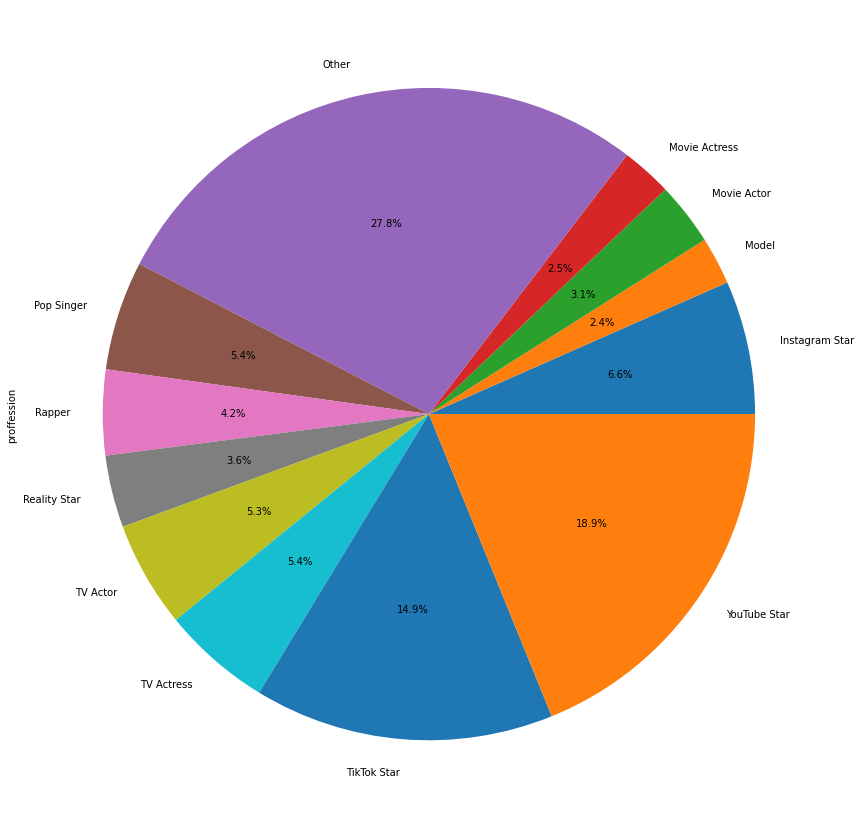

In [14]:
SOME_THRESHOLD = 830

piechart_df = top20df.proffession.value_counts(dropna=False).to_frame().reset_index()
piechart_df.loc[:, 'combined_label'] = piechart_df.apply(combine_other, axis=1)
piechart_df.groupby('combined_label').proffession.sum()\
.plot.pie(figsize=(15,15),autopct='%1.1f%%')


### 2. Top rated proffession from the 20% top rated people

<AxesSubplot:ylabel='proffession'>

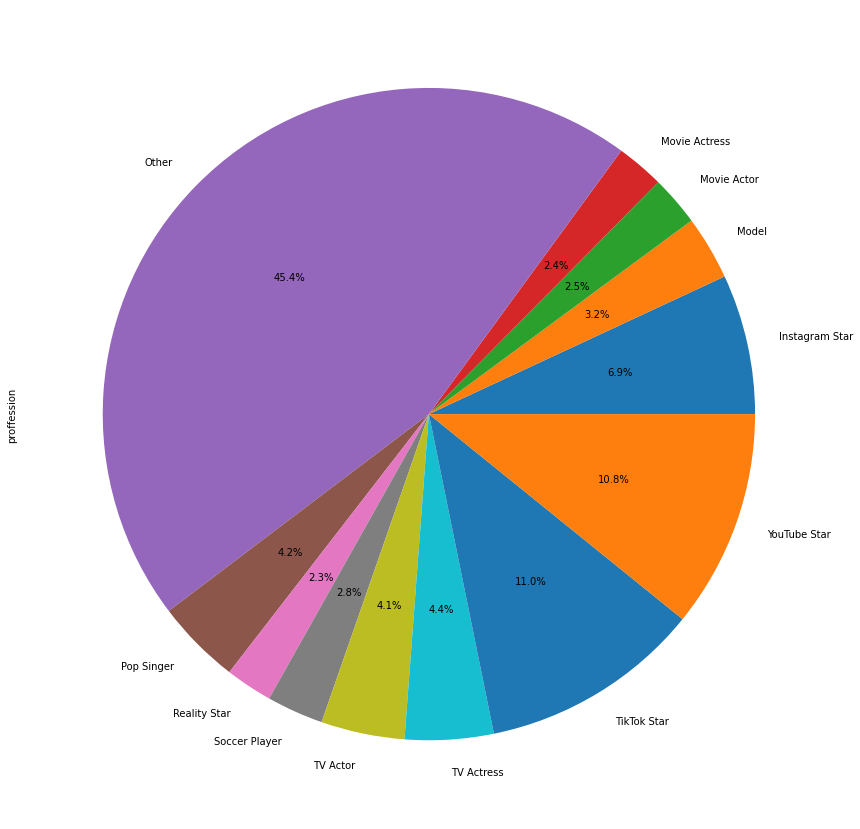

In [13]:
SOME_THRESHOLD = 5000

def combine_other(row):
    if row.proffession > SOME_THRESHOLD:
        return row['index']
    return 'Other'

piechart_df = datashow_df.proffession.value_counts(dropna=False).to_frame().reset_index()
piechart_df.loc[:, 'combined_label'] = piechart_df.apply(combine_other, axis=1)
piechart_df.groupby('combined_label').proffession.sum()\
   .plot.pie(figsize=(15,15),autopct='%1.1f%%')

In [15]:
popularity = list(range(1,222879))
datashow_df['popularity_rate']=popularity[::-1]

### 3. Popularity rate  of all the birth signs, 
#### we can see that taurus is the sign that most of the popular people were born to

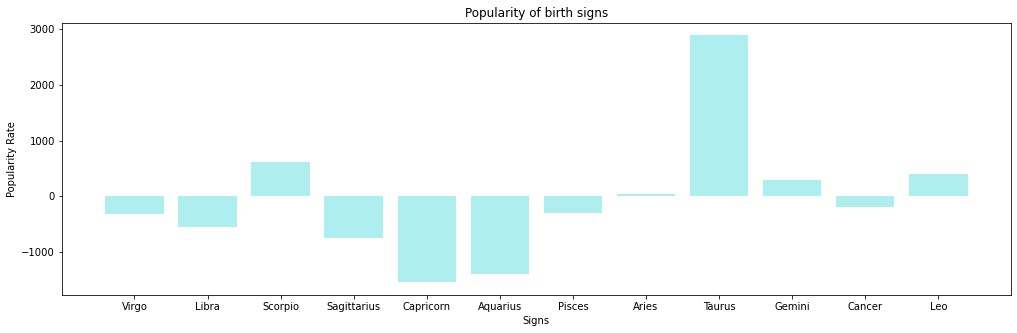

In [16]:
birth_signs = {'Virgo':None,'Libra':None,'Scorpio':None,'Sagittarius':None,'Capricorn':None,'Aquarius':None,'Pisces':None,'Aries':None,'Taurus':None,'Gemini':None,'Cancer':None,'Leo':None}

mean_total = datashow_df['popularity_rate'].mean()
for key in birth_signs:
    birth_signs[key]=datashow_df[datashow_df['Birth Sign']==key]['popularity_rate'].mean()-mean_total

plt.figure(figsize=(17,5))
x_signs,y_popularity_signs = zip(*birth_signs.items())
plt.bar(x_signs,y_popularity_signs,color='paleturquoise')
plt.title('Popularity of birth signs')
plt.xlabel('Signs')
plt.ylabel('Popularity Rate')

plt.show()

In [17]:
top_x_prof = list(df['proffession'].value_counts().head(6).keys())

### 4. Average popularity rate to all ages for the top six proffession
#### Only ages that were above 0.005% times calculated to avoid exceptional values that could cause to wrong analysis.

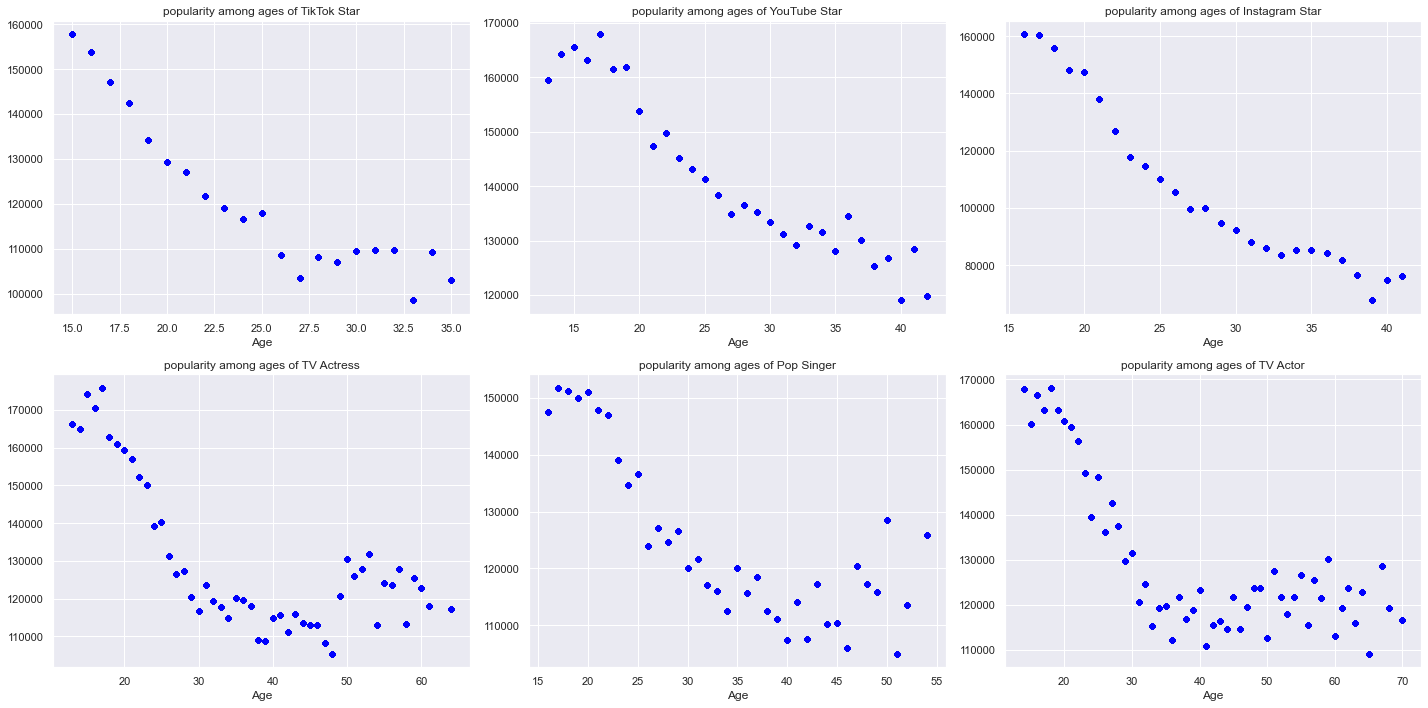

In [22]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2,(len(top_x_prof)//2),figsize=(20,10))
axe =axes.flatten()
j=0
df_graph_array=[]
for pro in top_x_prof:
    proffesion_df = datashow_df.loc[datashow_df['proffession'] == f"{pro}"]
    proffesion_df = proffesion_df.loc[proffesion_df['Age'].between(1,150)]
    means = {'Age': [],
            'Popularity':[]}
    for age in proffesion_df['Age']:
        temp=proffesion_df.loc[proffesion_df['Age']==age]
        if (len(temp)>(len(proffesion_df)*0.005)):
            means['Age'].append(age)
            means['Popularity'].append(temp['popularity_rate'].mean())
    x = pd.DataFrame.from_dict(means)
    x.plot(kind = 'scatter', x='Age',y='Popularity',title = f"popularity among ages of {pro}", ax= axe[j],color='blue')
    axe[j].set_ylabel('')
    j+=1
plt.tight_layout()

### All the data above in one visualization


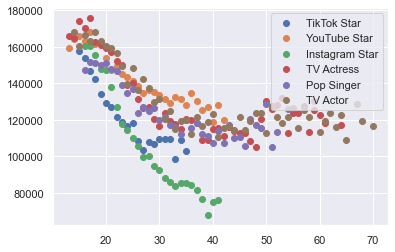

In [23]:
for pro in top_x_prof:
    proffesion_df = datashow_df.loc[datashow_df['proffession'] == f"{pro}"]
    proffesion_df = proffesion_df.loc[proffesion_df['Age'].between(1,150)]
    means = {}
    for age in proffesion_df['Age']:
        temp=proffesion_df.loc[proffesion_df['Age']==age]
        if (len(temp)>(len(proffesion_df)*0.005)):
            means[age]=temp['popularity_rate'].mean()
    plt.scatter(means.keys(),means.values(),label=f"{pro}")
plt.legend()
plt.show()

In [125]:
top20df=datashow_df[0:2*tenprecent]

### 5. Heat map of the 10 top proffessions against birth signs based on popularity  

In [126]:
heat_df= top20df.copy()
top_x_prof = list(heat_df['proffession'].value_counts().head(10).keys())

In [127]:
 heat_df=heat_df.loc[heat_df['proffession'].isin(top_x_prof) & heat_df['Birth Sign'] != 0]

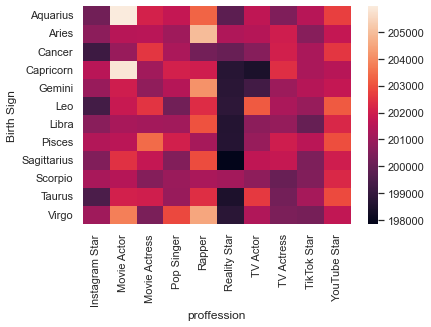

In [128]:
heat_df=heat_df.pivot_table("popularity_rate","Birth Sign","proffession",aggfunc='mean')
ax=sns.heatmap(heat_df)
